#### 以下是朴素贝叶斯

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

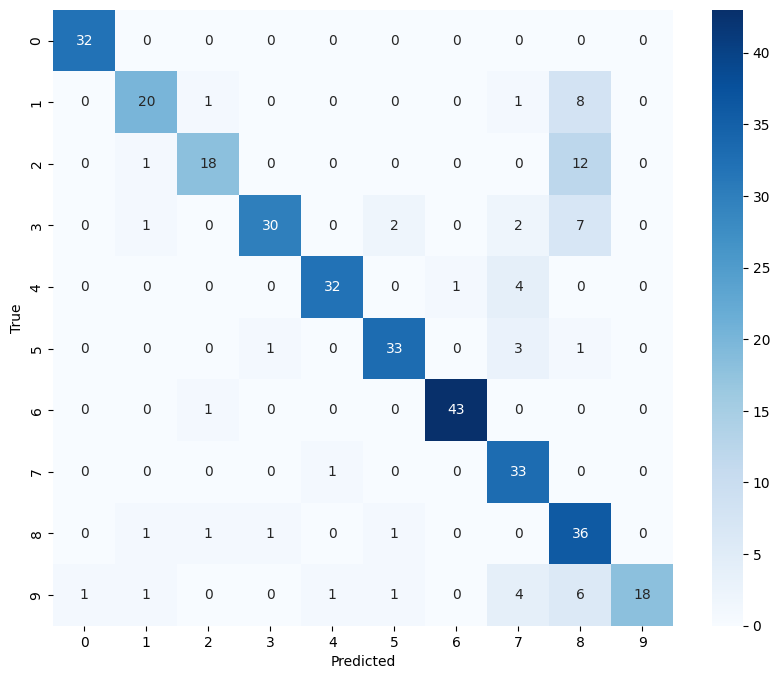

In [5]:
from sklearn.naive_bayes import GaussianNB  # 导入高斯朴素贝叶斯
from sklearn.datasets import load_digits  # 导入数字数据集
from sklearn.model_selection import train_test_split  # 用于对数据集的拆分
from sklearn import metrics

# 读取样本数据集
data = load_digits()
print(data)

# 提取特征数据和标签数据
feature = data.data
target = data.target

# 拆分数据
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=2021)

# 训练模型
nb = GaussianNB()  # 实例化模型对象
nb.fit(x_train, y_train)  # 训练模型

# 给模型评分
score = nb.score(x_test, y_test)
print(score)
# 预测
pred_result1 = nb.predict(x_test)
true_result1 = y_test
print('预测结果为：', pred_result1)
print('真实结果为：', true_result1)
print(metrics.classification_report(true_result1, pred_result1))
print(metrics.confusion_matrix(true_result1, pred_result1))
print(metrics.accuracy_score(true_result1, pred_result1))
from models import drawCM
drawCM.ConfusionMatrixPlotter(metrics.confusion_matrix(true_result1, pred_result1)).plot()

#### 以下是传统SVM

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.91      1.00      0.95        30
           2       1.00      1.00      1.00        31
           3       1.00      0.98      0.99        42
           4       1.00      1.00      1.00        37
           5       0.95      0.95      0.95        38
           6       1.00      0.98      0.99        44
           7       0.97      1.00      0.99        34
           8       1.00      0.90      0.95        40
           9       0.91      0.97      0.94        32

    accuracy                           0.97       360
   macro avg       0.97      0.98      0.97       360
weighted avg       0.98      0.97      0.98       360

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  1  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  2]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0

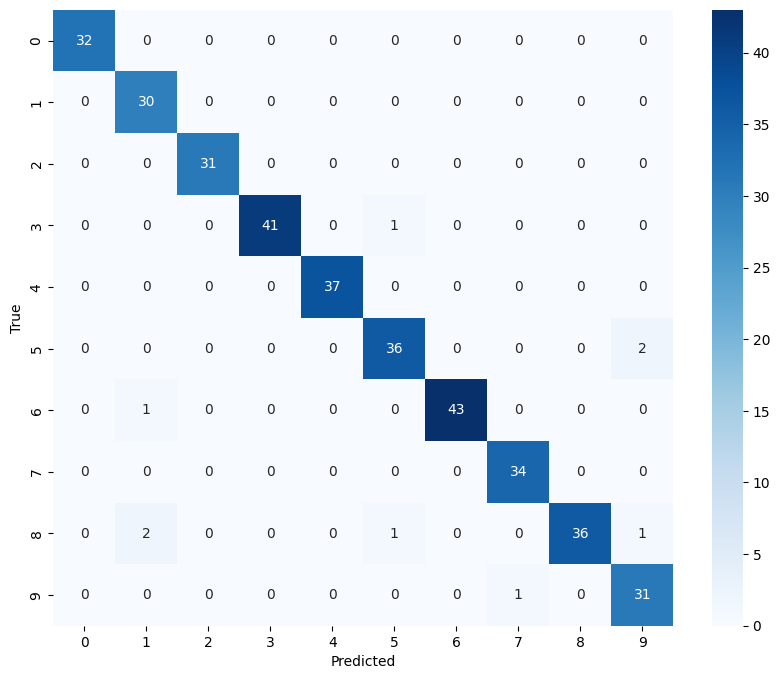

In [6]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=39).fit(x_train, y_train)
breast_cancer_test_pred_svm = svc.predict(x_test)
print(metrics.classification_report(y_test, breast_cancer_test_pred_svm))
print(metrics.confusion_matrix(y_test, breast_cancer_test_pred_svm))
print(metrics.accuracy_score(y_test, breast_cancer_test_pred_svm))
from models import drawCM
drawCM.ConfusionMatrixPlotter(metrics.confusion_matrix(y_test, breast_cancer_test_pred_svm)).plot()

#### 以下是逻辑回归

In [7]:
from models import logicalReturn
# 选择最佳的学习率和epoch数
learning_rates = [0.001, 0.01, 0.1]
epochs_options = [100, 500, 1000]

best_accuracy = 0
best_lr = 0
best_epoch = 0

for lr in learning_rates:
    for epoch in epochs_options:
        print(f'Testing LR: {lr}, Epoch: {epoch}')
        model = logicalReturn.MulticlassLogisticRegression(lr=lr, epochs=epoch)
        mean_accuracy = model.cross_validate(feature, target, cv=5)
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_lr = lr
            best_epoch = epoch

print(f'Best LR: {best_lr}, Best Epoch: {best_epoch}, Best Accuracy: {best_accuracy}')

# 使用最佳参数训练模型
model = logicalReturn.MulticlassLogisticRegression(lr=best_lr, epochs=best_epoch)
X_train, X_test, y_train, y_test = logicalReturn.train_test_split(feature, target, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
model.evaluate(X_test, y_test)

Testing LR: 0.001, Epoch: 100
Accuracy: 0.8333333333333334
Confusion Matrix:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  7  0  0  0  0  5]
 [ 0  3 28  0  2  0  0  3  0  0]
 [ 0  0  2 32  0  0  0  2  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  1]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  1  0  0 35  0  0]
 [ 0 10  2  0  0  2  1  4 15  1]
 [ 0  0  3  3  0  0  0  7  0 23]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.63      0.67      0.65        36
           2       0.80      0.78      0.79        36
           3       0.91      0.89      0.90        36
           4       0.79      1.00      0.88        37
           5       0.95      0.97      0.96        36
           6       0.97      0.97      0.97        36
           7       0.69      0.97      0.80        36
           8       1.00      0.43      0.60        35
           9       0.77     

(0.9592592592592593,
 array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 46,  2,  0,  0,  0,  0,  0,  2,  0],
        [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  2, 48,  0,  1,  0,  0,  3,  0],
        [ 0,  1,  0,  0, 59,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, 63,  1,  0,  0,  2],
        [ 0,  0,  0,  0,  1,  0, 52,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
        [ 0,  1,  0,  0,  0,  1,  0,  0, 41,  0],
        [ 0,  0,  0,  2,  0,  0,  0,  0,  2, 55]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        53\n           1       0.96      0.92      0.94        50\n           2       0.92      1.00      0.96        47\n           3       0.96      0.89      0.92        54\n           4       0.98      0.98      0.98        60\n           5       0.97      0.95      0.96        66\n           6       0.98      0.98      0.98        53\n           7       1